<a href="https://colab.research.google.com/github/fyansyarafa/mall-customer-segmentation/blob/main/Mall%20Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries & Data

In [223]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [224]:
bins = 15

In [225]:
df = pd.read_csv("https://raw.githubusercontent.com/fyansyarafa/mall-customer-segmentation/main/Mall_Customers.csv", error_bad_lines=False)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Pra-proses Data
Hanya akan dilakukan pengecekkan missing values pada dataset.

In [226]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory Data Analysis

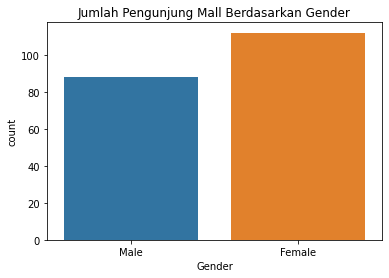

In [227]:
sns.countplot(data=df, x='Gender')
plt.title('Jumlah Pengunjung Mall Berdasarkan Gender');

Pengunjung mall sepertinya didominasi oleh wanita. Dengan proporsi seperti yang ditunjukkan dalam pie chart di bawah ini:

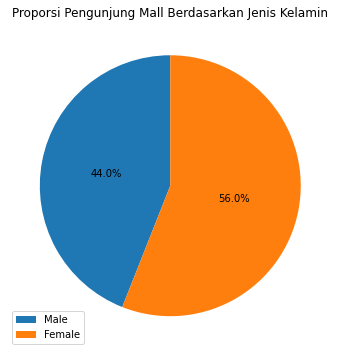

In [228]:
dict = {
    'Male' : len(df[df.Gender == 'Male']['Gender']),
    'Female' : len(df[df.Gender == 'Female']['Gender'])
}

ser_gender = pd.Series(dict)

pie, ax = plt.subplots(figsize=[10,6])
labels = ser_gender.keys()
plt.pie(x=ser_gender, autopct="%.1f%%", pctdistance=0.5, startangle=90)
plt.title("Proporsi Pengunjung Mall Berdasarkan Jenis Kelamin")
plt.legend(labels=labels);

Akan dilihat secara lebih detail untuk masing-masing tipe gender. Insight apa saja yang akan didapatkan?

In [229]:
# mask untuk gender
gender_male = df.Gender == 'Male'
gender_female = df.Gender == 'Female'

In [230]:
# dataframe baru berdasarkan mask di atas
df_male = df.loc[gender_male]
df_female = df.loc[gender_female]

In [231]:
df_male.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


## Gender = 'Male'
Distribusi `Age`, `Annual Income`, dan `Spending Score` untuk `Gender == 'Male'`:

In [232]:
cont_feats = list(df.columns)[2:]

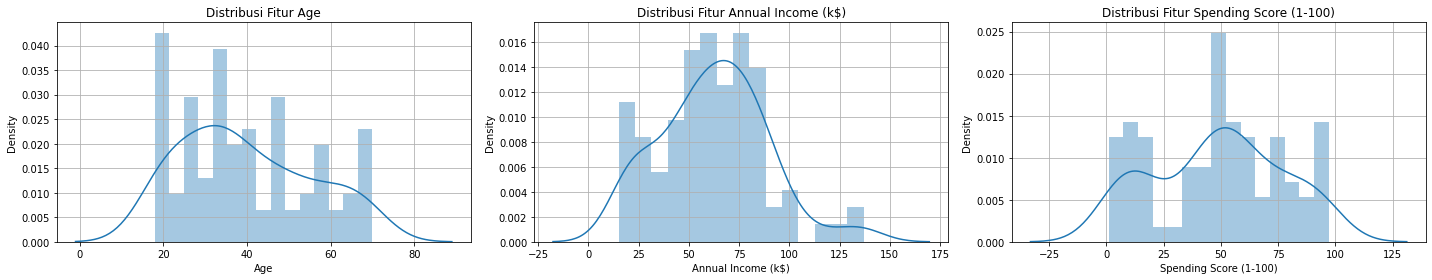

In [233]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Distribusi Fitur "+cont_feats[i])
  sns.distplot(df_male[cont_feats[i]], bins=bins)
  plt.grid(True)
plt.tight_layout()

Dalam histogram:

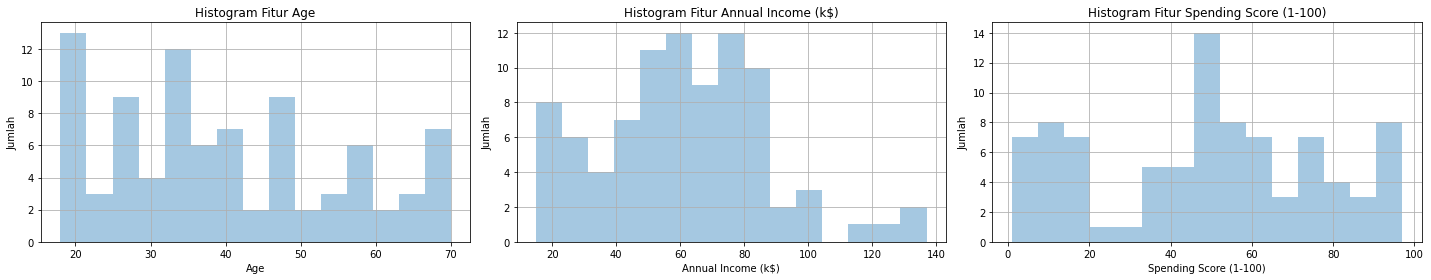

In [234]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Histogram Fitur "+cont_feats[i])
  sns.distplot(df_male[cont_feats[i]],kde=False,bins=bins)
  plt.grid(True)
  plt.ylabel('Jumlah')
plt.tight_layout()

Apabila dibandingkan dengan keseluruhan pengunjung, maka distribusinya adalah sebagai berikut.

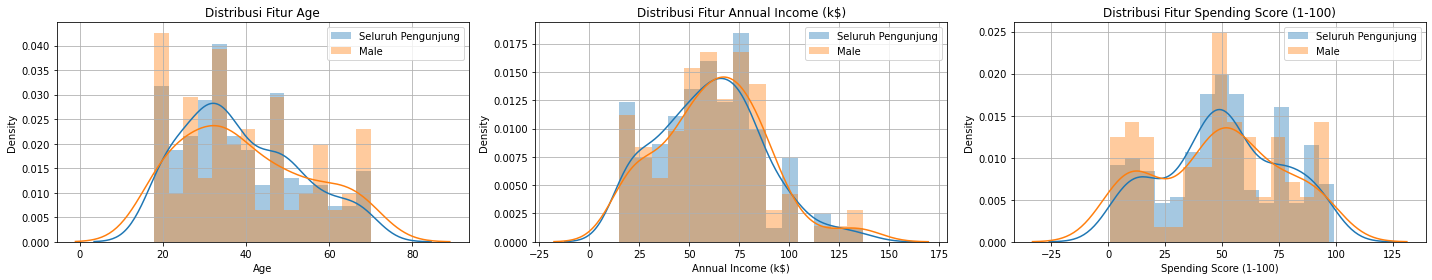

In [235]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Distribusi Fitur "+cont_feats[i])
  sns.distplot(df[cont_feats[i]], label='Seluruh Pengunjung',bins=bins)
  sns.distplot(df_male[cont_feats[i]], label='Male',bins=15)
  plt.grid(True)
  plt.legend();
plt.tight_layout()


Dalam histogram:

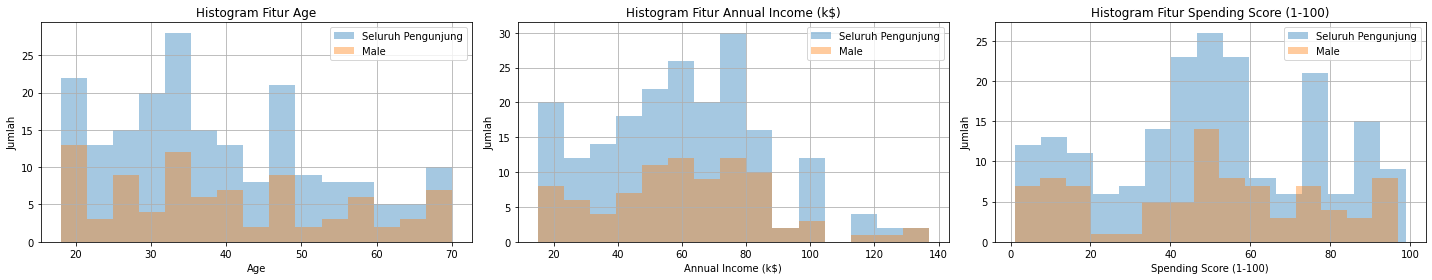

In [236]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Histogram Fitur "+cont_feats[i])
  sns.distplot(df[cont_feats[i]], label='Seluruh Pengunjung',kde=False,bins=bins)
  sns.distplot(df_male[cont_feats[i]], label='Male',kde=False,bins=bins)
  plt.grid(True)
  plt.ylabel('Jumlah')
  plt.legend();
plt.tight_layout()

Pada Gender = Male, distribusi usianya banyak berada pada usia 30an awal, 20an awal, serta pada usia mendekati 50 tahun. Dan cukup mendominasi pada usia 60 tahunan akhir dari keseluruhan pengunjung di usia tersebut.

Income pengunjung mall dari mulai dari angka sekitar $ 20k, terus menanjak distribusinya hingga usia early 80. Walupun sempat menurun pada rentang usia 20-40 tahun. 

Spending score gender male hampir berimbang di segala rentang score. Walaupun terdapat minim sekali pada rentang 20 sampai sekitar 35.



## Gender = 'Female'
Distribusi `Age`, `Annual Income`, dan `Spending Score` untuk `Gender == 'Female'`:

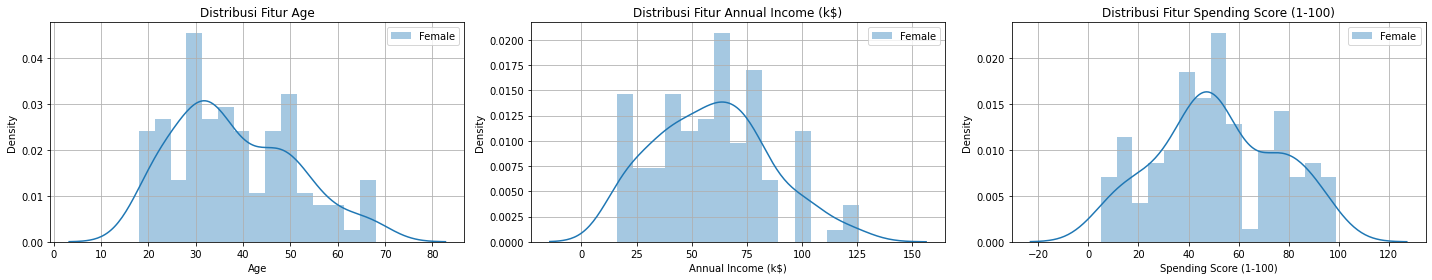

In [237]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Distribusi Fitur "+cont_feats[i])
  sns.distplot(df_female[cont_feats[i]], label='Female',bins=bins)
  plt.grid(True)
  plt.legend();
plt.tight_layout()


Dalam histogram:

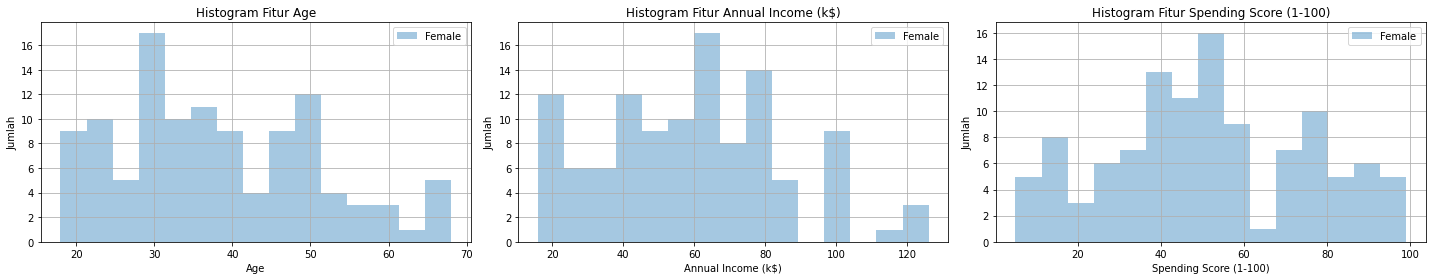

In [238]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Histogram Fitur "+cont_feats[i])
  sns.distplot(df_female[cont_feats[i]], label='Female',kde=False,bins=bins)
  plt.grid(True)
  plt.legend();
  plt.ylabel('Jumlah')
plt.tight_layout()


Apabila dibandingkan dengan keseluruhan pengunjung, maka distribusinya adalah sebagai berikut.

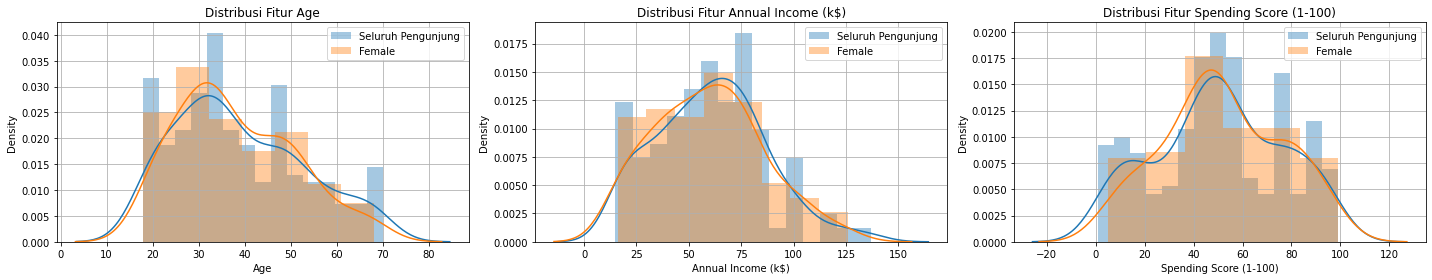

In [239]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Distribusi Fitur "+cont_feats[i])
  sns.distplot(df[cont_feats[i]], label='Seluruh Pengunjung',bins=bins)
  plt.grid(True)
  sns.distplot(df_female[cont_feats[i]], label='Female')
  plt.legend();
plt.tight_layout()


Dalam bentuk histogram:

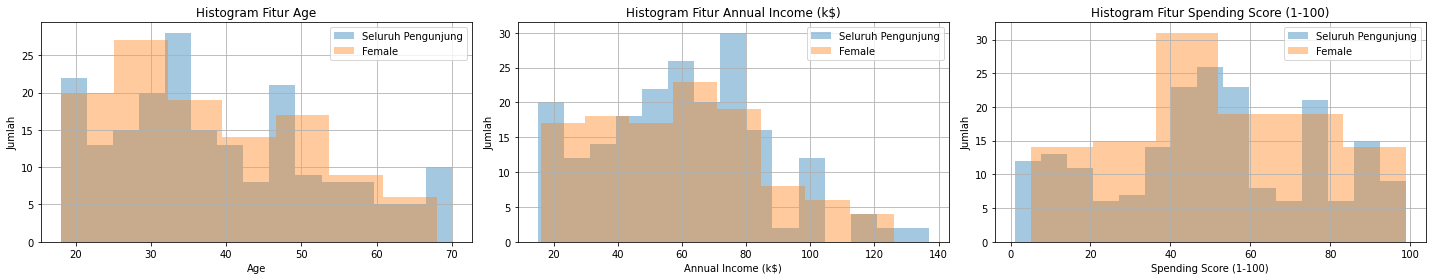

In [240]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Histogram Fitur "+cont_feats[i])
  sns.distplot(df[cont_feats[i]], label='Seluruh Pengunjung',kde=False,bins=bins)
  plt.grid(True)
  sns.distplot(df_female[cont_feats[i]], label='Female',kde=False)
  plt.legend()
  plt.ylabel('Jumlah')
plt.tight_layout()


Dari distribusi dan histogram di atas, nampaknya gender female sangat mendominasi di segala aspek dari keseluruhan pengunjung mall. Mulai dari rentang usia, income, serta spending score.

## Male vs Female

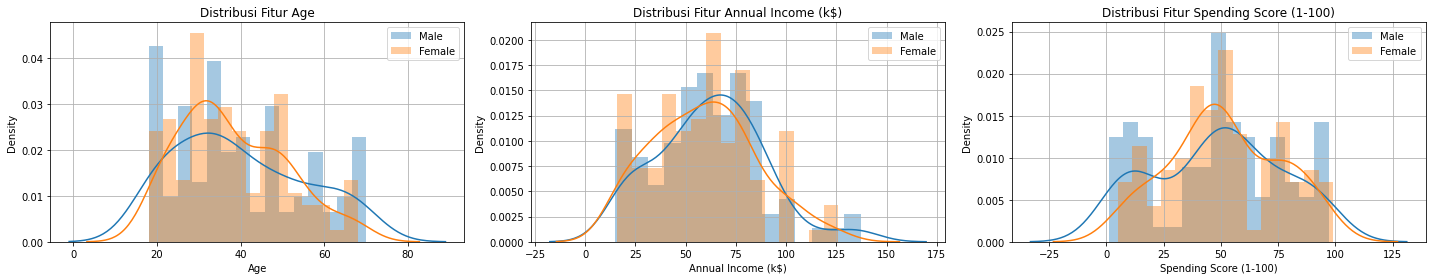

In [241]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Distribusi Fitur "+cont_feats[i])
  sns.distplot(df_male[cont_feats[i]], label='Male',bins=bins)
  sns.distplot(df_female[cont_feats[i]], label='Female', bins=15)
  plt.grid(True)
  plt.legend();
plt.tight_layout()


Dalam Histogram:

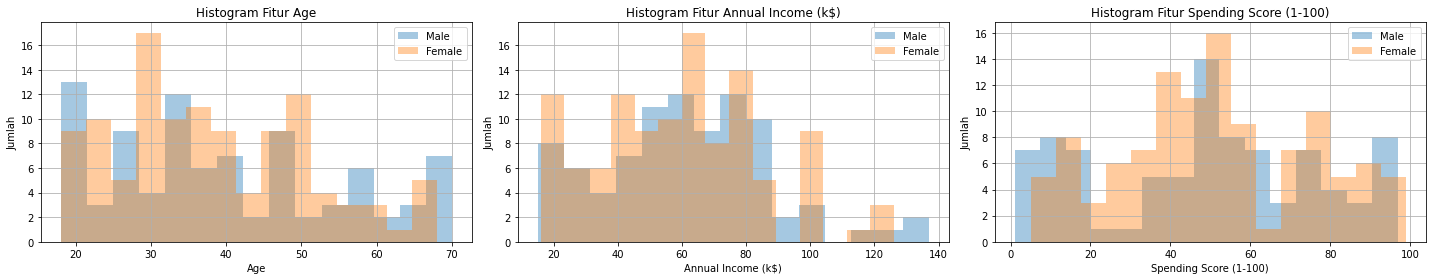

In [242]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats)):
  plt.subplot(1, 3, i+1)
  plt.title("Histogram Fitur "+cont_feats[i])
  sns.distplot(df_male[cont_feats[i]], label='Male',kde=False,bins=bins)
  sns.distplot(df_female[cont_feats[i]], label='Female',kde=False, bins=15)
  plt.ylabel('Jumlah')
  plt.grid(True)
  plt.legend();
plt.tight_layout()


# Klasterisasi Mall Customers menggunakan K-Means

## Menyiapkan Data (Features Engineering)

In [245]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [246]:
df_for_clustering = df.iloc[:, [3, 4]]
df_for_clustering.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Standarisasi *values* dengan mean 0 dan standar deviasi 1.

In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()

column_names = df_for_clustering.columns.tolist()
df_for_clustering[column_names] = scaler.fit_transform(df_for_clustering[column_names])
df_for_clustering.head()



,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Mencari Jumlah Klaster Terbaik


### Dengan Elbow Method

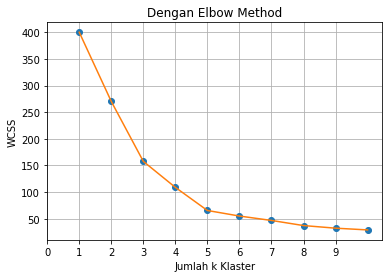

In [249]:
array_for_clustering = df_for_clustering.to_numpy()


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(array_for_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'o')
plt.plot(range(1, 11), wcss)
plt.xticks(ticks=np.arange(0,10,1))
plt.title('Dengan Elbow Method')
plt.xlabel('Jumlah k Klaster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Pemilihan jumlah k klaster dengan elbow method menunjukkan hubungan antara jumlah k klaster dengan WCSS (within cluster sum of squares). WCSS, mendefenisikan jarak sum of squares antara setiap klaster dengan centroidnya. WCSS akan terus menurun tajam hingga pada titik ideal, kurvanya mulai melambat penurunannya.

Dari k = 1 terus menurun dengan tajam hingga akhirnya penurunannya melambat pada k = 3, tetapi melambat lagi lagi pada k = 5.

Jadi yang berpotensi sebagai k ideal adalah 3 atau 5.

Karena jumlah klaster yang paling ideal hanya satu, maka dilanjutkan dengan silhoutte method. Nilai koefisien silhoutte paling tinggi, maka itulah jumlah k yang paling ideal.



### Dengan Silhoutte Method

In [250]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(array_for_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(array_for_clustering, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.28640637225274423
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5398800926790663
For n_clusters=7, The Silhouette Coefficient is 0.5263454490712252
For n_clusters=8, The Silhouette Coefficient is 0.4541279523637649
For n_clusters=9, The Silhouette Coefficient is 0.4527137182637434
For n_clusters=10, The Silhouette Coefficient is 0.4408047020350327


## Memodelkan K-Means 

### Training K-Means

Dengan k klaster = 5:

In [251]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(array_for_clustering)

### Visualisasi Klaster

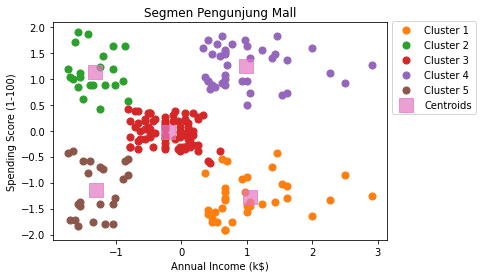

In [261]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_for_clustering)
plt.scatter(array_for_clustering[cluster == 0, 0], array_for_clustering[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(array_for_clustering[cluster == 1, 0], array_for_clustering[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(array_for_clustering[cluster == 2, 0], array_for_clustering[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(array_for_clustering[cluster == 3, 0], array_for_clustering[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(array_for_clustering[cluster == 4, 0], array_for_clustering[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Segmen Pengunjung Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.0, 1.03));

In [253]:
df_cluster_1 = pd.DataFrame(data=scaler.inverse_transform(array_for_clustering[cluster == 0]),columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_cluster_2 = pd.DataFrame(data=scaler.inverse_transform(array_for_clustering[cluster == 1]),columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_cluster_3 = pd.DataFrame(data=scaler.inverse_transform(array_for_clustering[cluster == 2]),columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_cluster_4 = pd.DataFrame(data=scaler.inverse_transform(array_for_clustering[cluster == 3]),columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_cluster_5 = pd.DataFrame(data=scaler.inverse_transform(array_for_clustering[cluster == 4]),columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Analisis Klaster

In [254]:
print(df_cluster_1.shape)
print(df_cluster_2.shape)
print(df_cluster_3.shape)
print(df_cluster_4.shape)
print(df_cluster_5.shape)

(35, 2)
(22, 2)
(81, 2)
(39, 2)
(23, 2)


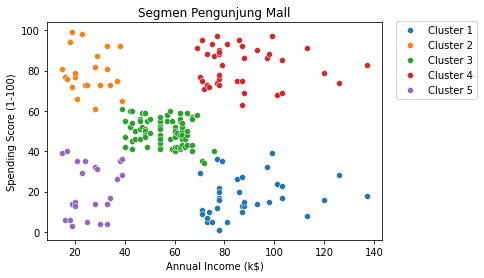

In [265]:
sns.scatterplot(data=df_cluster_1, x='Annual Income (k$)',y='Spending Score (1-100)',label='Cluster 1')
sns.scatterplot(data=df_cluster_2, x='Annual Income (k$)',y='Spending Score (1-100)',label='Cluster 2')
sns.scatterplot(data=df_cluster_3, x='Annual Income (k$)',y='Spending Score (1-100)',label='Cluster 3')
sns.scatterplot(data=df_cluster_4, x='Annual Income (k$)',y='Spending Score (1-100)',label='Cluster 4')
sns.scatterplot(data=df_cluster_5, x='Annual Income (k$)',y='Spending Score (1-100)',label='Cluster 5')
plt.title('Segmen Pengunjung Mall')
plt.legend(bbox_to_anchor=(1.3, 1.03));

## Profiling Klaster

### Cluster 1

In [292]:
print('Deskripsi Cluster 1')
df_cluster_1.describe().transpose()

Deskripsi Cluster 1


,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),35.0,88.200000,16.399067,70.0,77.5,85.0,97.5,137.0
Spending Score (1-100),35.0,17.114286,9.952154,1.0,10.0,16.0,23.5,39.0


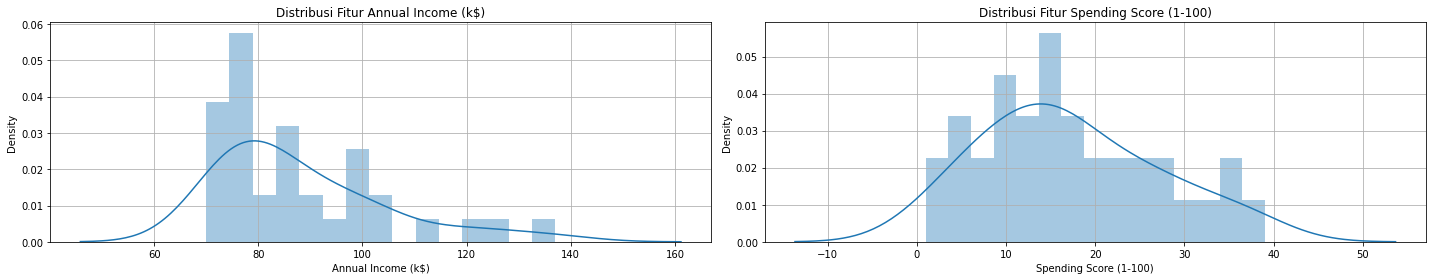

In [298]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats[1:])):
  plt.subplot(1, 2, i+1)
  plt.title("Distribusi Fitur "+cont_feats[1:][i])
  sns.distplot(df_cluster_1[cont_feats[1:][i]],bins=bins)
  plt.grid(True)
 # plt.legend();
plt.tight_layout()

**Cluster 1**, Annual Income secara average berada di angka $ 85k, dan spending score banyak berada pada angka 17.11. Artinya, pada cluster ini memiliki pemasukkan yang tinggi, dan dengan pengeluaran yang kecil. Terbukti dengan angka spending score yang rendah. Dapat disebut sebagai cluster dengan para customer yang sangat **hemat**.

### Cluster 2

In [290]:
print('Deskripsi Cluster 2')
df_cluster_2.describe().transpose()

Deskripsi Cluster 2


,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0
Spending Score (1-100),22.0,79.363636,10.504174,61.0,73.00,77.0,85.75,99.0


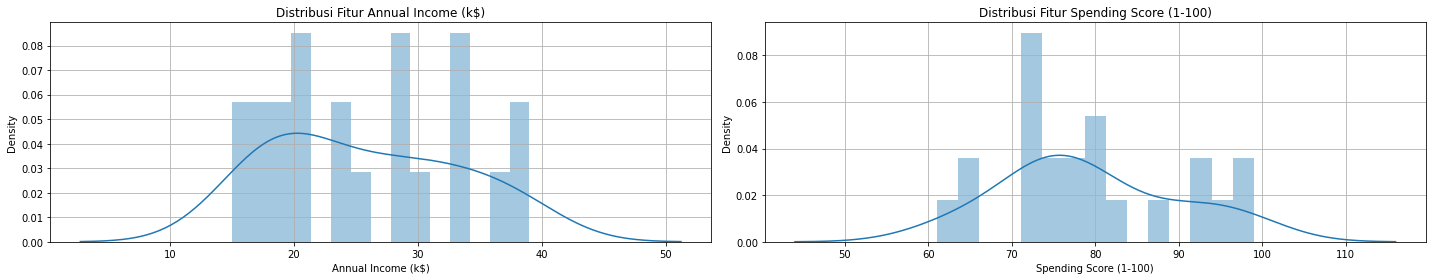

In [299]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats[1:])):
  plt.subplot(1, 2, i+1)
  plt.title("Distribusi Fitur "+cont_feats[1:][i])
  sns.distplot(df_cluster_2[cont_feats[1:][i]],bins=bins)
  plt.grid(True)
 # plt.legend();
plt.tight_layout()

**Cluster 2**, Annual Income secara average berada di angka sekitar $ 25k, dan spending score didominasi pada angka 73. Artinya, pada cluster ini memiliki pemasukkan terbilang rendah, dan dengan pengeluaran yang besar. Cluster ini dapat disebut sebagai cluster paling **boros**.

### Cluster 3

In [300]:
print('Deskripsi Cluster 3')
df_cluster_3.describe().transpose()

Deskripsi Cluster 3


,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),81.0,55.296296,8.988109,39.0,48.0,54.0,62.0,76.0
Spending Score (1-100),81.0,49.518519,6.530909,34.0,44.0,50.0,55.0,61.0


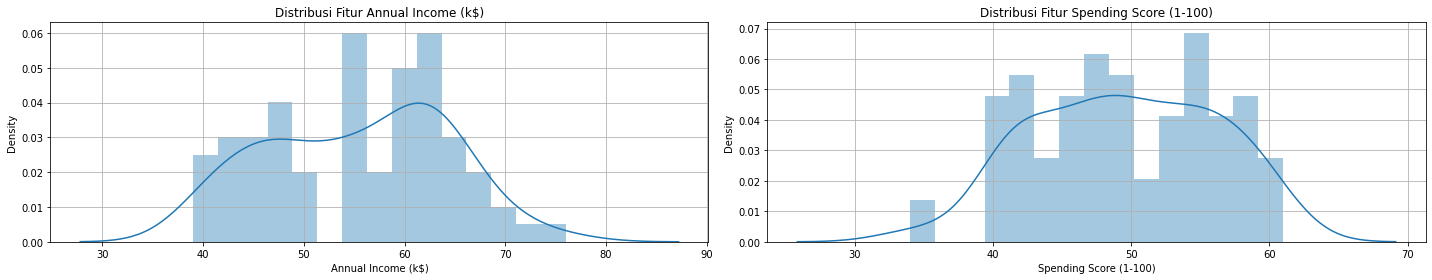

In [301]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats[1:])):
  plt.subplot(1, 2, i+1)
  plt.title("Distribusi Fitur "+cont_feats[1:][i])
  sns.distplot(df_cluster_3[cont_feats[1:][i]],bins=bins)
  plt.grid(True)
 # plt.legend();
plt.tight_layout()

**Cluster 3**, Annual Income secara average berada di angka sekitar $ 55k, dan spending score secara rata-rata berada pada angka 49. Artinya, pada cluster ini memiliki pemasukkan menengah, dan dengan pengeluaran menengah pula. Cluster ini dapat disebut sebagai cluster yang **normal**.

### Cluster 4

In [302]:
print('Deskripsi Cluster 4')
df_cluster_4.describe().transpose()

Deskripsi Cluster 4


,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0


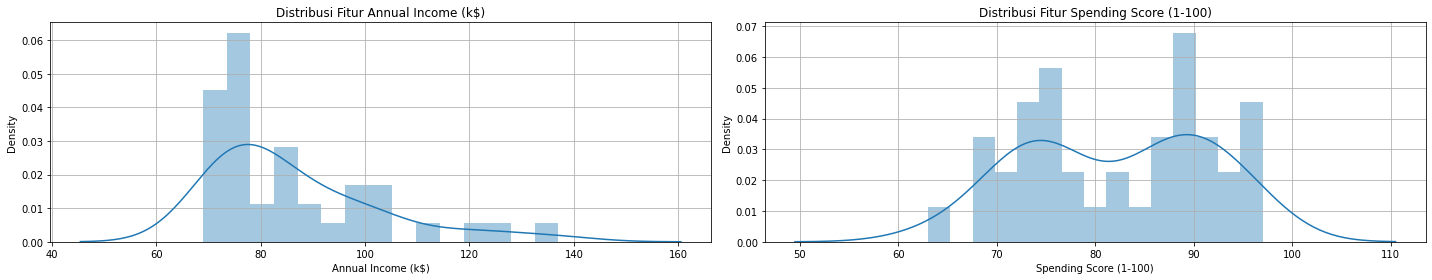

In [303]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats[1:])):
  plt.subplot(1, 2, i+1)
  plt.title("Distribusi Fitur "+cont_feats[1:][i])
  sns.distplot(df_cluster_4[cont_feats[1:][i]],bins=bins)
  plt.grid(True)
 # plt.legend();
plt.tight_layout()

**Cluster 4**, Annual Income secara average berada di angka sekitar $ 79k, dan spending score secara rata-rata berada pada angka sekitar 82. Artinya, pada cluster ini memiliki pemasukkan tinggi, dan dengan pengeluaran tinggi pula. Cluster ini juga dapat dinamakan **normal tinggi**.

### Cluster 5

In [304]:
print('Deskripsi Cluster 5')
df_cluster_5.describe().transpose()

Deskripsi Cluster 5


,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),23.0,26.304348,7.893811,15.0,19.5,25.0,33.0,39.0
Spending Score (1-100),23.0,20.913043,13.017167,3.0,9.5,17.0,33.5,40.0


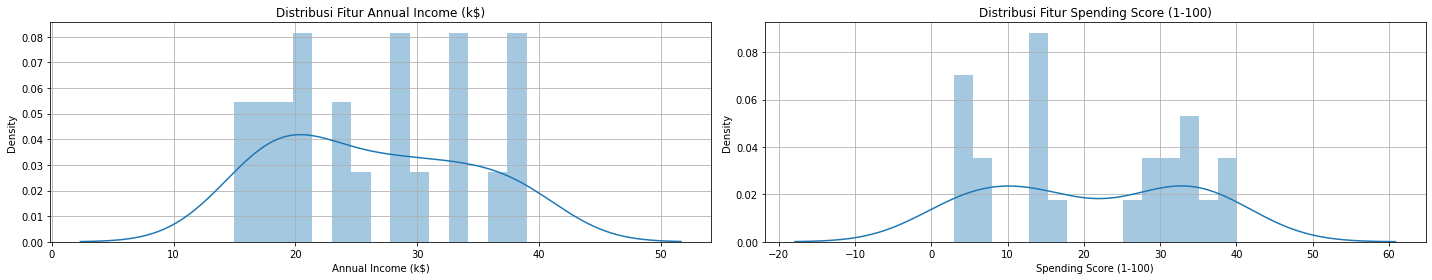

In [305]:
plt.figure(figsize=(20,4))
for i in range(len(cont_feats[1:])):
  plt.subplot(1, 2, i+1)
  plt.title("Distribusi Fitur "+cont_feats[1:][i])
  sns.distplot(df_cluster_5[cont_feats[1:][i]],bins=bins)
  plt.grid(True)
 # plt.legend();
plt.tight_layout()

**Cluster 5**, Annual Income secara average berada di angka sekitar $ 25k, dan spending score secara rata-rata berada pada angka 20.91. Artinya, pada cluster ini memiliki pemasukkan rendah, dan dengan pengeluaran yang terbilang rendah pula. Cluster ini juga dapat dinamakan **normal rendah**.

## Nama-Nama Klaster Final
Dari klasterisasi dan profiling masing-masing klaster di atas, di dapatkan nama-nama klaster yang lebih representatif dengan deskripsi yang sudah dijabarkan sebelumnya.

Klaster-klaster tersebut adalah


1.   Hemat
2.   Boros
3. Normal
4. Normal Tinggi
5. Normal Rendah

Jika divisualisasikan sebarannya:



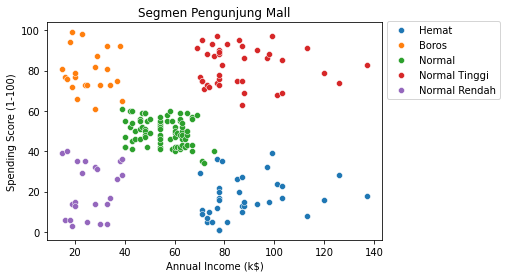

In [309]:
sns.scatterplot(data=df_cluster_1, x='Annual Income (k$)',y='Spending Score (1-100)',label='Hemat')
sns.scatterplot(data=df_cluster_2, x='Annual Income (k$)',y='Spending Score (1-100)',label='Boros')
sns.scatterplot(data=df_cluster_3, x='Annual Income (k$)',y='Spending Score (1-100)',label='Normal')
sns.scatterplot(data=df_cluster_4, x='Annual Income (k$)',y='Spending Score (1-100)',label='Normal Tinggi')
sns.scatterplot(data=df_cluster_5, x='Annual Income (k$)',y='Spending Score (1-100)',label='Normal Rendah')
plt.title('Segmen Pengunjung Mall')
plt.legend(bbox_to_anchor=(1., 1.03));

Mohon disertakan *feedback*-nya.